### Decision Tree is a Supervised learning technique that can be used for both classification and Regression problem, but mostly it is preferred for solving classification problems.

### In order to build a tree, we use the **CART** algorithm, which stands for **Classification and Regression Tree Algorithm**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.image as mpimg

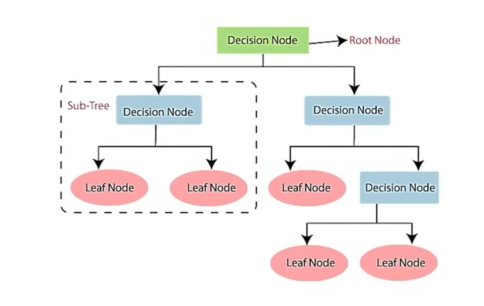

In [2]:
plt.figure(figsize=(6, 6))
img = mpimg.imread('Image/decision_tree.png')
plt.imshow(img)
plt.axis('off')
plt.show()

### Important Terminology related to Decision Trees

### **Root Node:** It represents the entire population or sample and this further gets divided into two or more homogeneous sets.

### **Splitting:** It is a process of dividing a node into two or more sub-nodes.

### **Decision Node:** When a sub-node splits into further sub-nodes, then it is called the decision node.

### **Leaf / Terminal Node:** Nodes do not split is called Leaf or Terminal node.

### **Pruning:** When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.

### **Branch / Sub-Tree:** A subsection of the entire tree is called branch or sub-tree.

### **Parent and Child Node:** A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

## **ATTRIBUTE SELECTION MEASURES**

### This measurement, we can easily select the best attribute for the nodes of the tree. There are two popular techniques for ASM, which are:
#### 1. Information Gain
#### 2. Entropy / Gini Index

### **Entropy** : Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data.

### $$Entropy(s) = - P(yes) \log_2 P(yes) - P(no) \log_2 P(no)$$

### **Where :**
#### S= Total number of samples
#### P(yes) = probability of yes
#### P(no) = probability of no

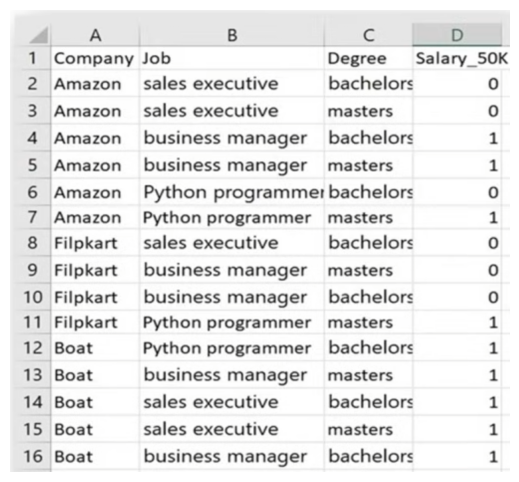

In [3]:
plt.figure(figsize=(8, 6))
img = mpimg.imread('Image/data_for_explaination.png')
plt.imshow(img)
plt.axis('off')
plt.show()

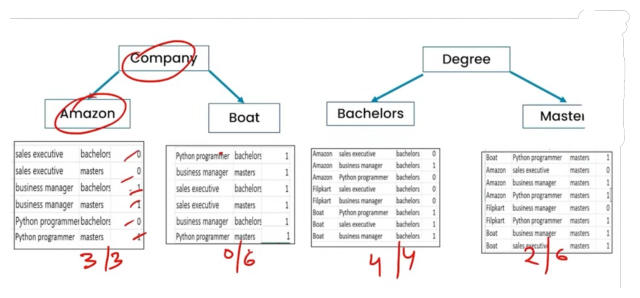

In [4]:
plt.figure(figsize=(8, 6))
img = mpimg.imread('Image/first_best_column.png')
plt.imshow(img)
plt.axis('off')
plt.show()

### **Information Gain :** Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute. It calculates how much information a feature provides us about a class.

### $$ Information Gain = Entropy(S) - [(Weighted Avg) Entropy(each feature)] $$

In [5]:
# we do here is finding which column threw we need to start so we are drow Entropy and find best data
# which data gives us more information, that data we are choose
# here we can show we choose coumpany because we can directly say if coumpany boat then you get job
# we need to select column which have low Entropy because thag give more information

### **Gini Index :** Gini index is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.

### An attribute with the low Gini index should be preferred as compared to the high Gini index.

### Gini Index = 1 - Σ jPj2

In [6]:
df = pd.read_csv('../Dataset/Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

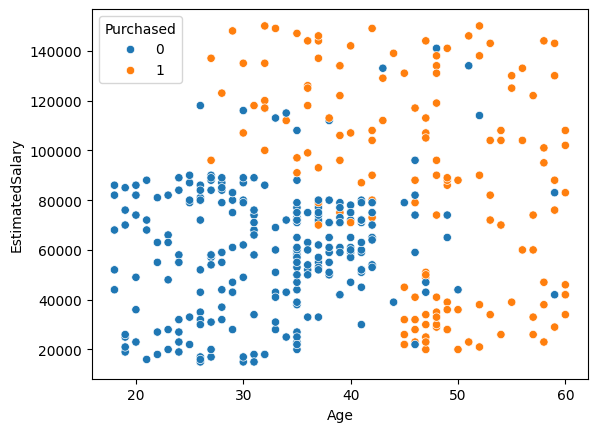

In [7]:
sns.scatterplot(x = 'Age', y = 'EstimatedSalary', data = df, hue = 'Purchased')

In [8]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1:]
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()
sc.fit(x)
new = pd.DataFrame(sc.transform(x), columns=x.columns)
new

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(new, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt = DecisionTreeClassifier()

In [15]:
dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
dt.score(x_test, y_test)*100

83.75

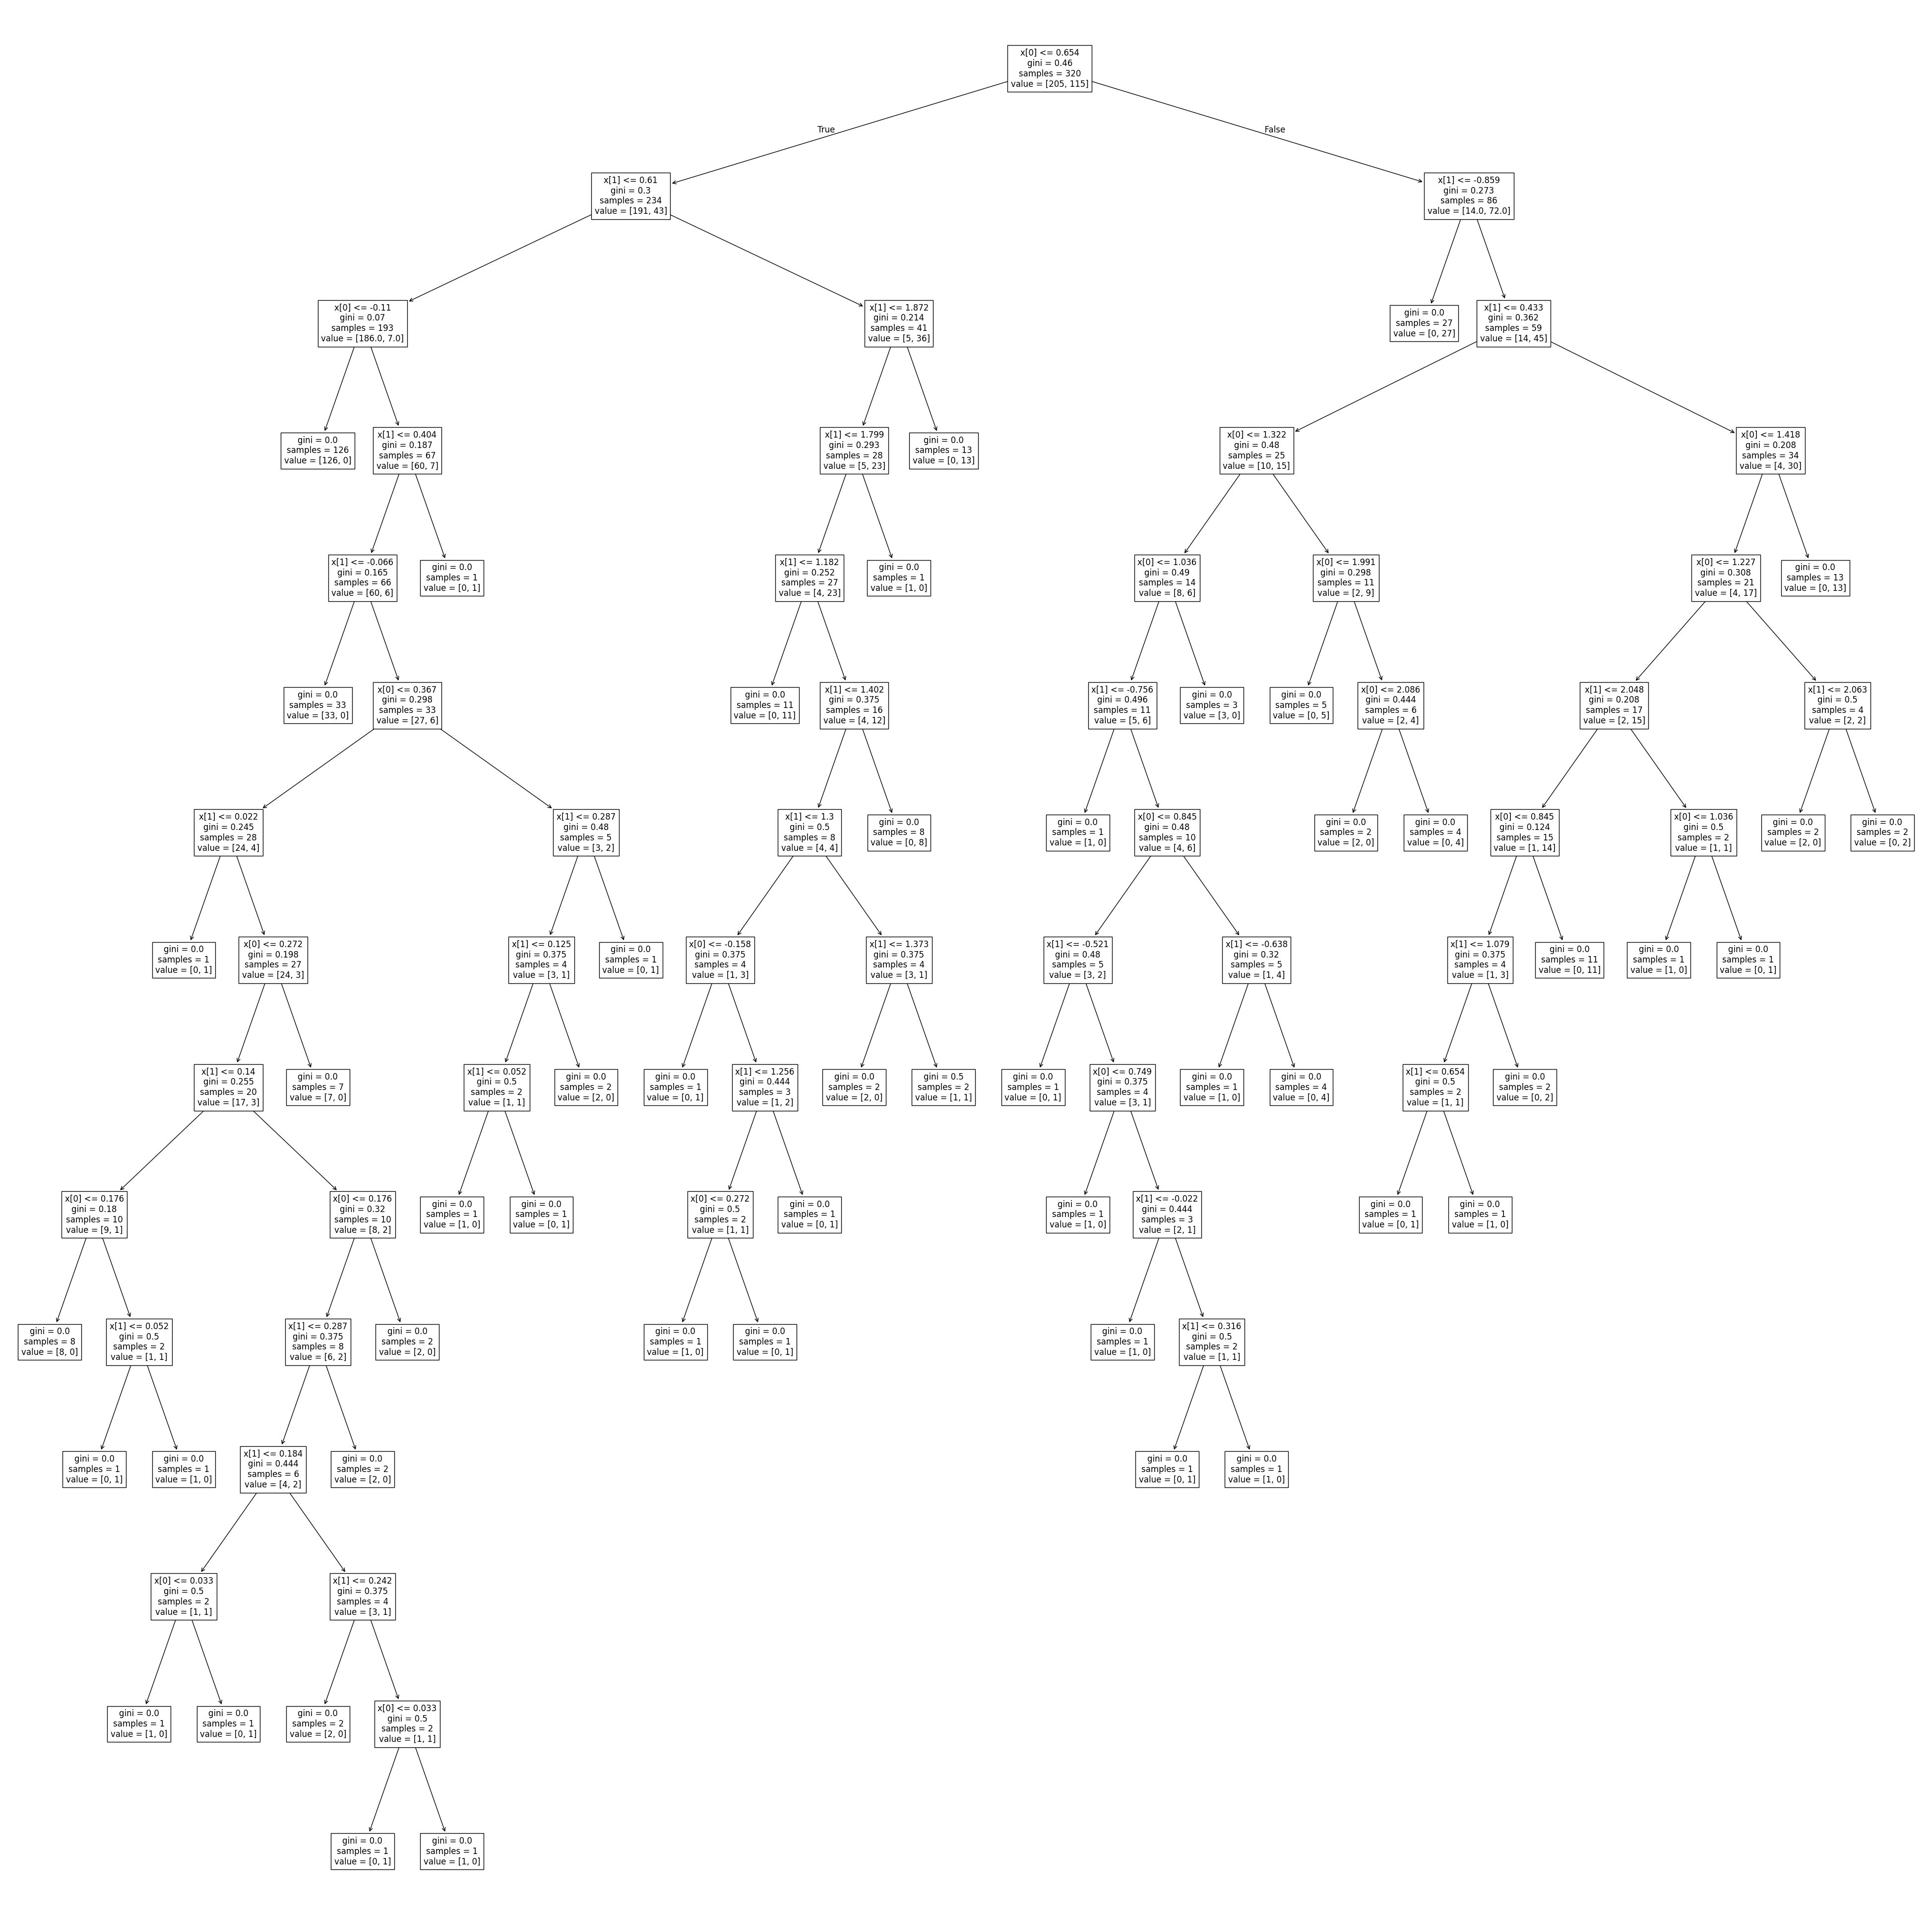

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 50))
plot_tree(dt)
plt.savefig('Image/Binary_tree_format')
plt.show()

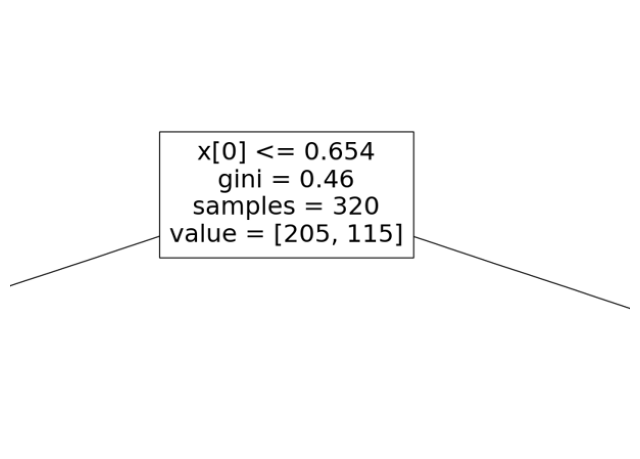

In [18]:
plt.figure(figsize=(8, 6))
img = mpimg.imread('Image/first_node.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [19]:
# In this First Node we can show This Decision tree take x[0] means 'Age' column first so which means
# our data's Inproty score is lower than second one 
# and also gain information is high that check autometicly by function 
# we train this model on 420 columns
# this dataset Gini index of Age that's why it's take Age column as a first node

In [20]:
# Let's compare all starting index.

In [21]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(x_train, y_train)
dt.score(x_test, y_test)*100

83.75

In [22]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train, y_train)
dt.score(x_test, y_test)*100

83.75

In [23]:
dt = DecisionTreeClassifier(criterion='log_loss')
dt.fit(x_train, y_train)
dt.score(x_test, y_test)*100

83.75

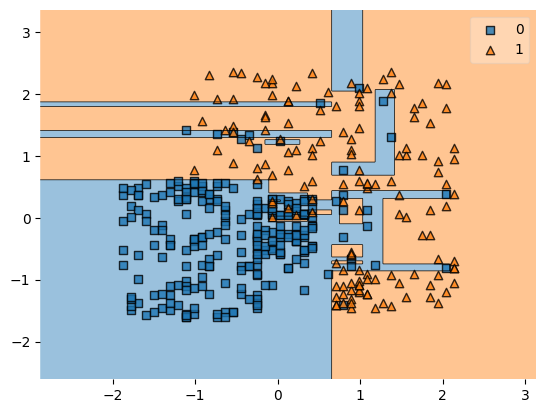

In [24]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(new.to_numpy(), y.to_numpy().flatten(), clf=dt)
plt.show()

## **Pre and post Pruning**

### **Pre Pruning**

In [25]:
# When we are show our model do Overfiting Then we are use Pruning
# Pruning help us to increae our model accureccy

In [26]:
# When there is so difference in Training data Prediction score and 
#               Testing Data Prediction score then we can there is overfiting

In [27]:
print(dt.score(x_train, y_train)*100)
print(dt.score(x_test, y_test)*100)
# We can show there is 17% different in Training and testing so we can say there is may be overfiting

99.6875
83.75


In [28]:
# We are use Max_deapth Here for match accureccy and 
# pre pruning means we already decide our depth of our model

In [29]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=5)
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train)*100)
print(dt.score(x_test, y_test)*100)
# here we can show Train and Test have no major difference

93.4375
90.0


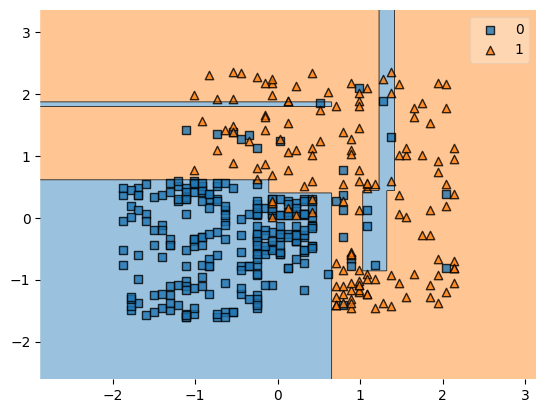

In [30]:
plot_decision_regions(new.to_numpy(), y.to_numpy().flatten(), clf=dt)
plt.show()

In [31]:
# now we Plot that Decision Tree and show there is only depth is 5

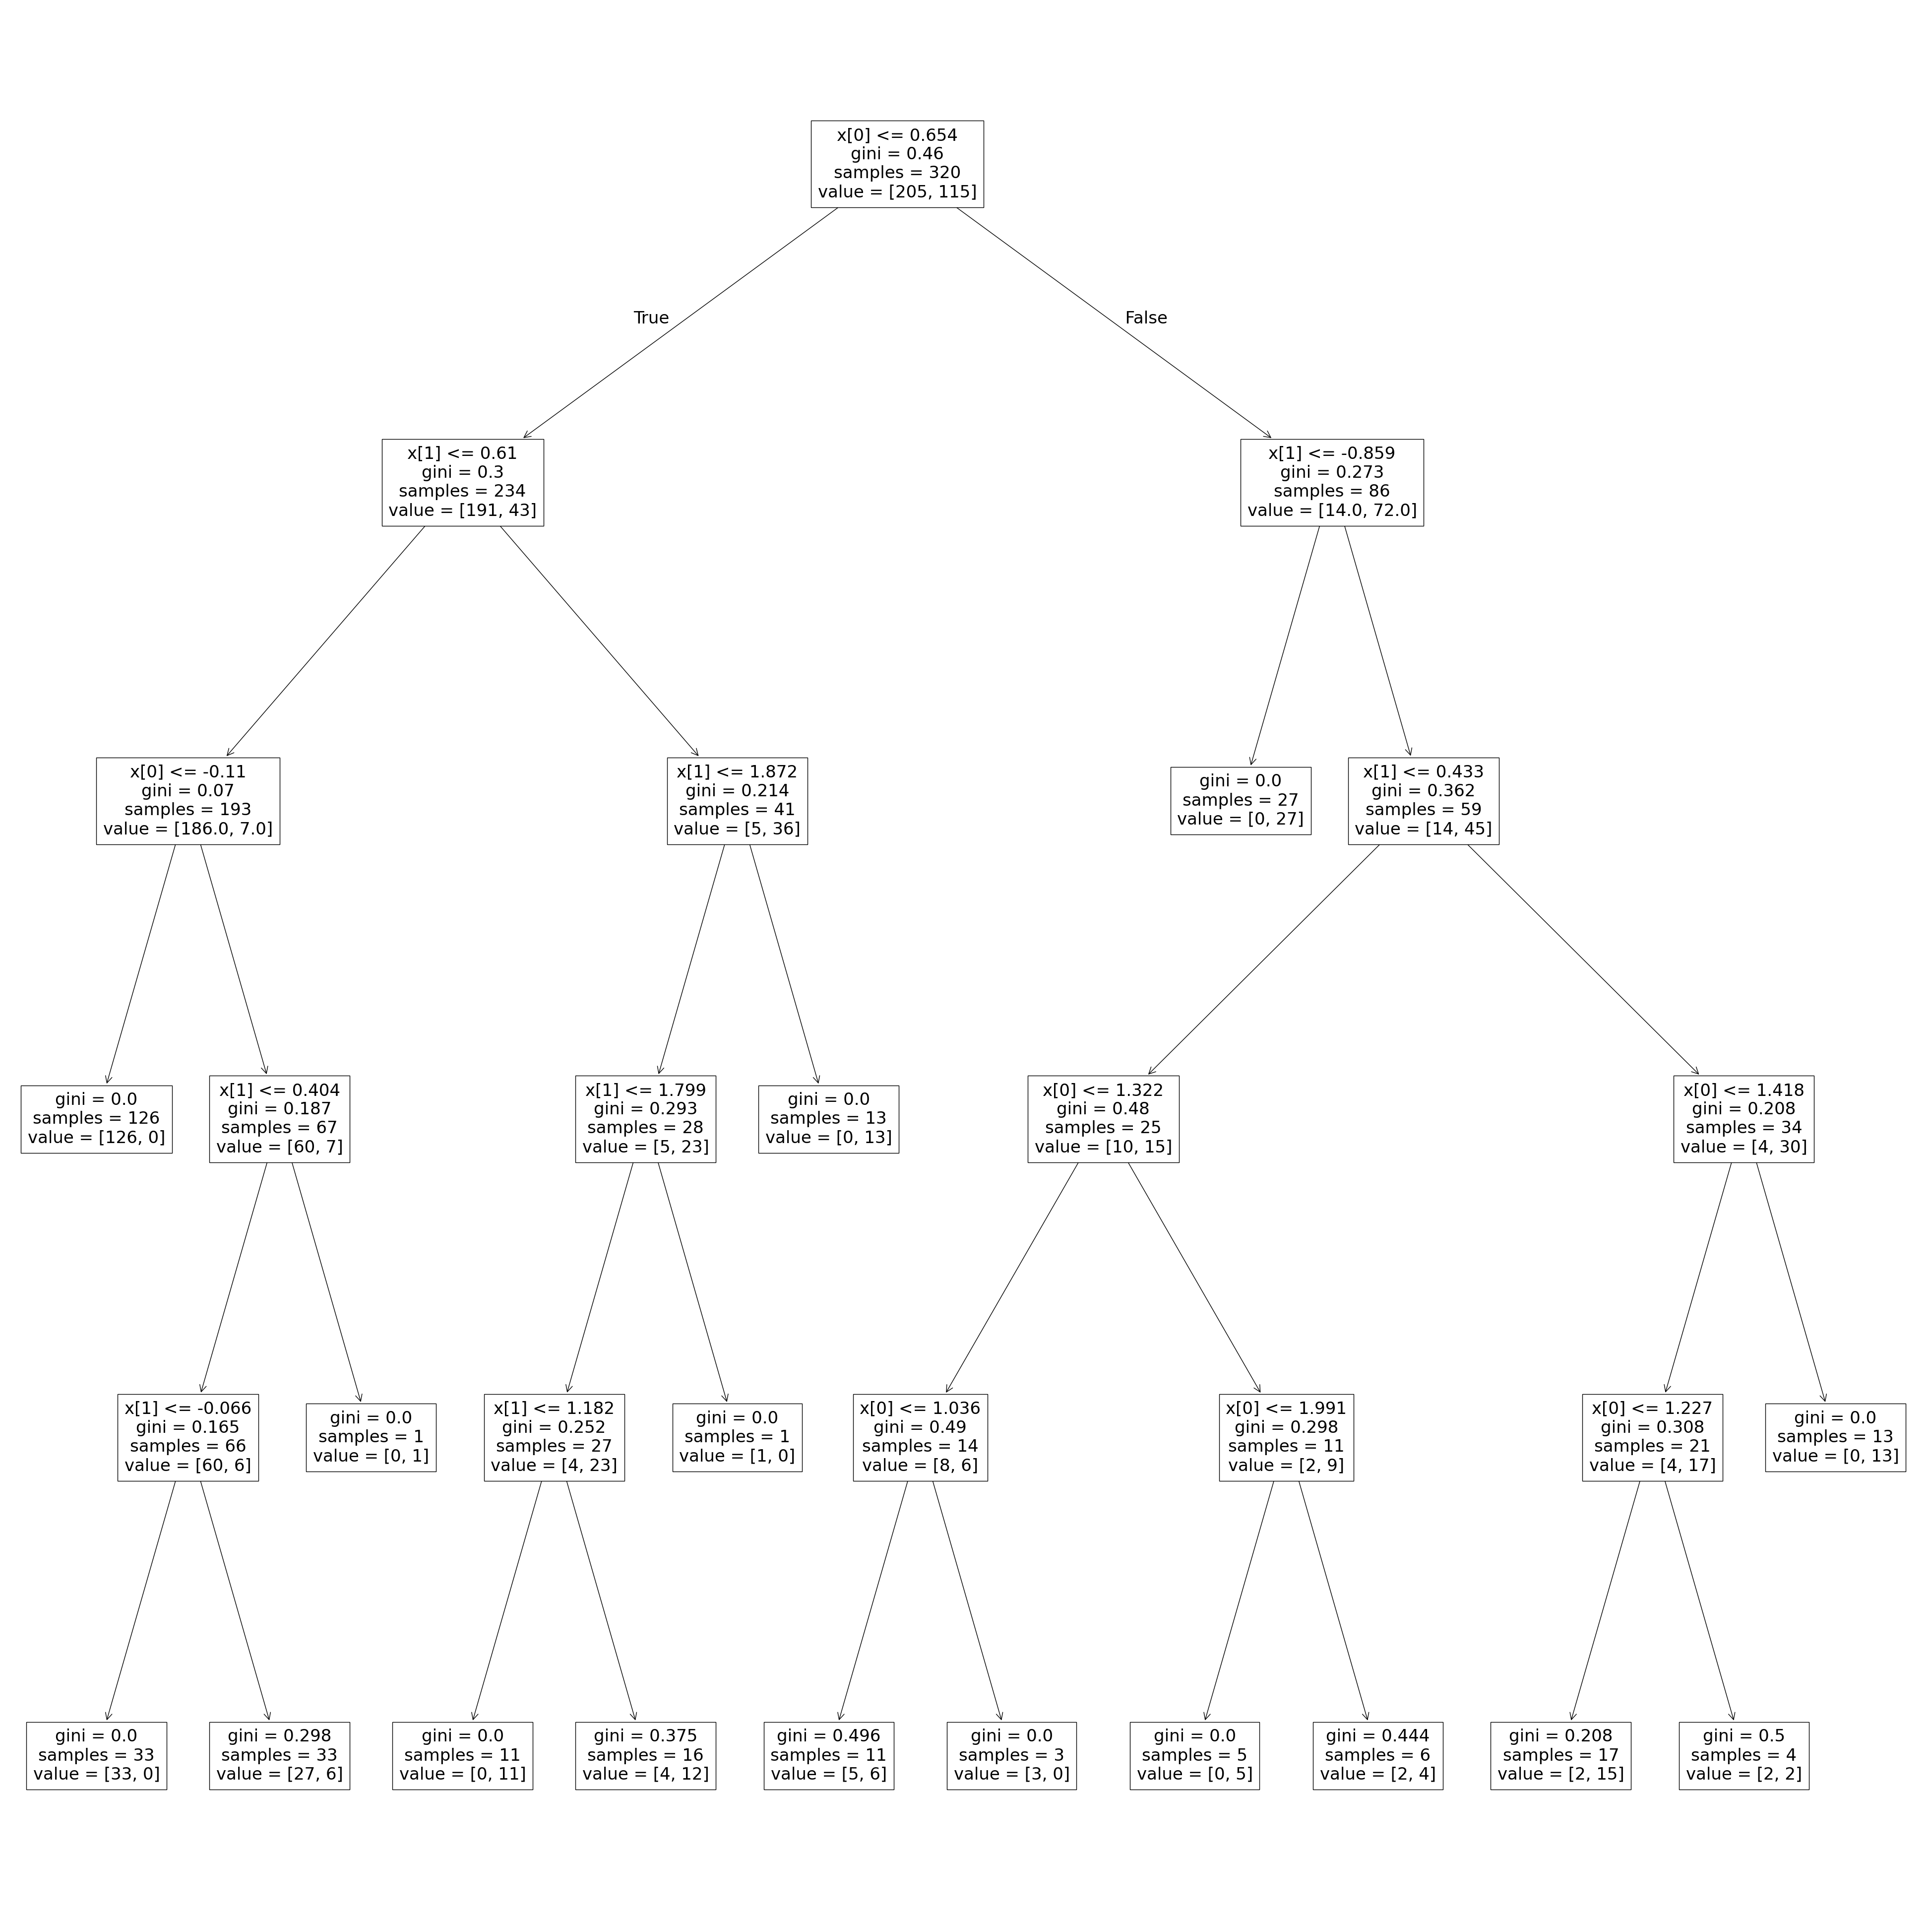

In [32]:
plt.figure(figsize=(50, 50))
plot_tree(dt)
plt.savefig('Image/Deapth5')
plt.show()

### **post Purning**

In [33]:
# Post purning is as simple as pre purning
# in pre purning we already decided which depth we want
# but in post pursing we create for loop and then try all Max-deapth
# and which best Depth give low train and test overfiting that Max-deapth we select
# and create final Pre Purning using that Max-deapth

In [34]:
for i in range(1, 20):
    dt = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dt.fit(x_train, y_train)
    print(f'Train Score = {(dt.score(x_train, y_train)*100)}, Test Score = {(dt.score(x_test, y_test)*100)}, Max Depth index = {i}, Train Score - Test Score = {(dt.score(x_train, y_train)*100)-(dt.score(x_test, y_test)*100)}')

Train Score = 82.1875, Test Score = 90.0, Max Depth index = 1, Train Score - Test Score = -7.8125
Train Score = 91.875, Test Score = 91.25, Max Depth index = 2, Train Score - Test Score = 0.625
Train Score = 91.875, Test Score = 91.25, Max Depth index = 3, Train Score - Test Score = 0.625
Train Score = 93.125, Test Score = 91.25, Max Depth index = 4, Train Score - Test Score = 1.875
Train Score = 93.4375, Test Score = 90.0, Max Depth index = 5, Train Score - Test Score = 3.4375
Train Score = 95.0, Test Score = 86.25, Max Depth index = 6, Train Score - Test Score = 8.75
Train Score = 96.875, Test Score = 85.0, Max Depth index = 7, Train Score - Test Score = 11.875
Train Score = 97.1875, Test Score = 85.0, Max Depth index = 8, Train Score - Test Score = 12.1875
Train Score = 98.125, Test Score = 85.0, Max Depth index = 9, Train Score - Test Score = 13.125
Train Score = 98.4375, Test Score = 85.0, Max Depth index = 10, Train Score - Test Score = 13.4375
Train Score = 99.0625, Test Score =

In [35]:
# so acording to that result we can say we must need to take our max_deapth value 2 or 3 for best...

In [36]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train)*100)
print(dt.score(x_test, y_test)*100)
# here we can show Train and Test have no major difference

91.875
91.25


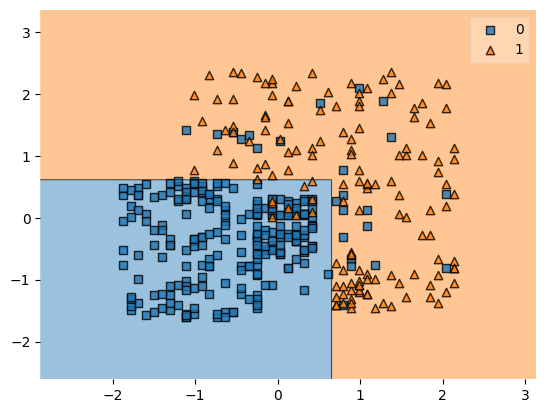

In [37]:
plot_decision_regions(new.to_numpy(), y.to_numpy().flatten(), clf=dt)
plt.show()

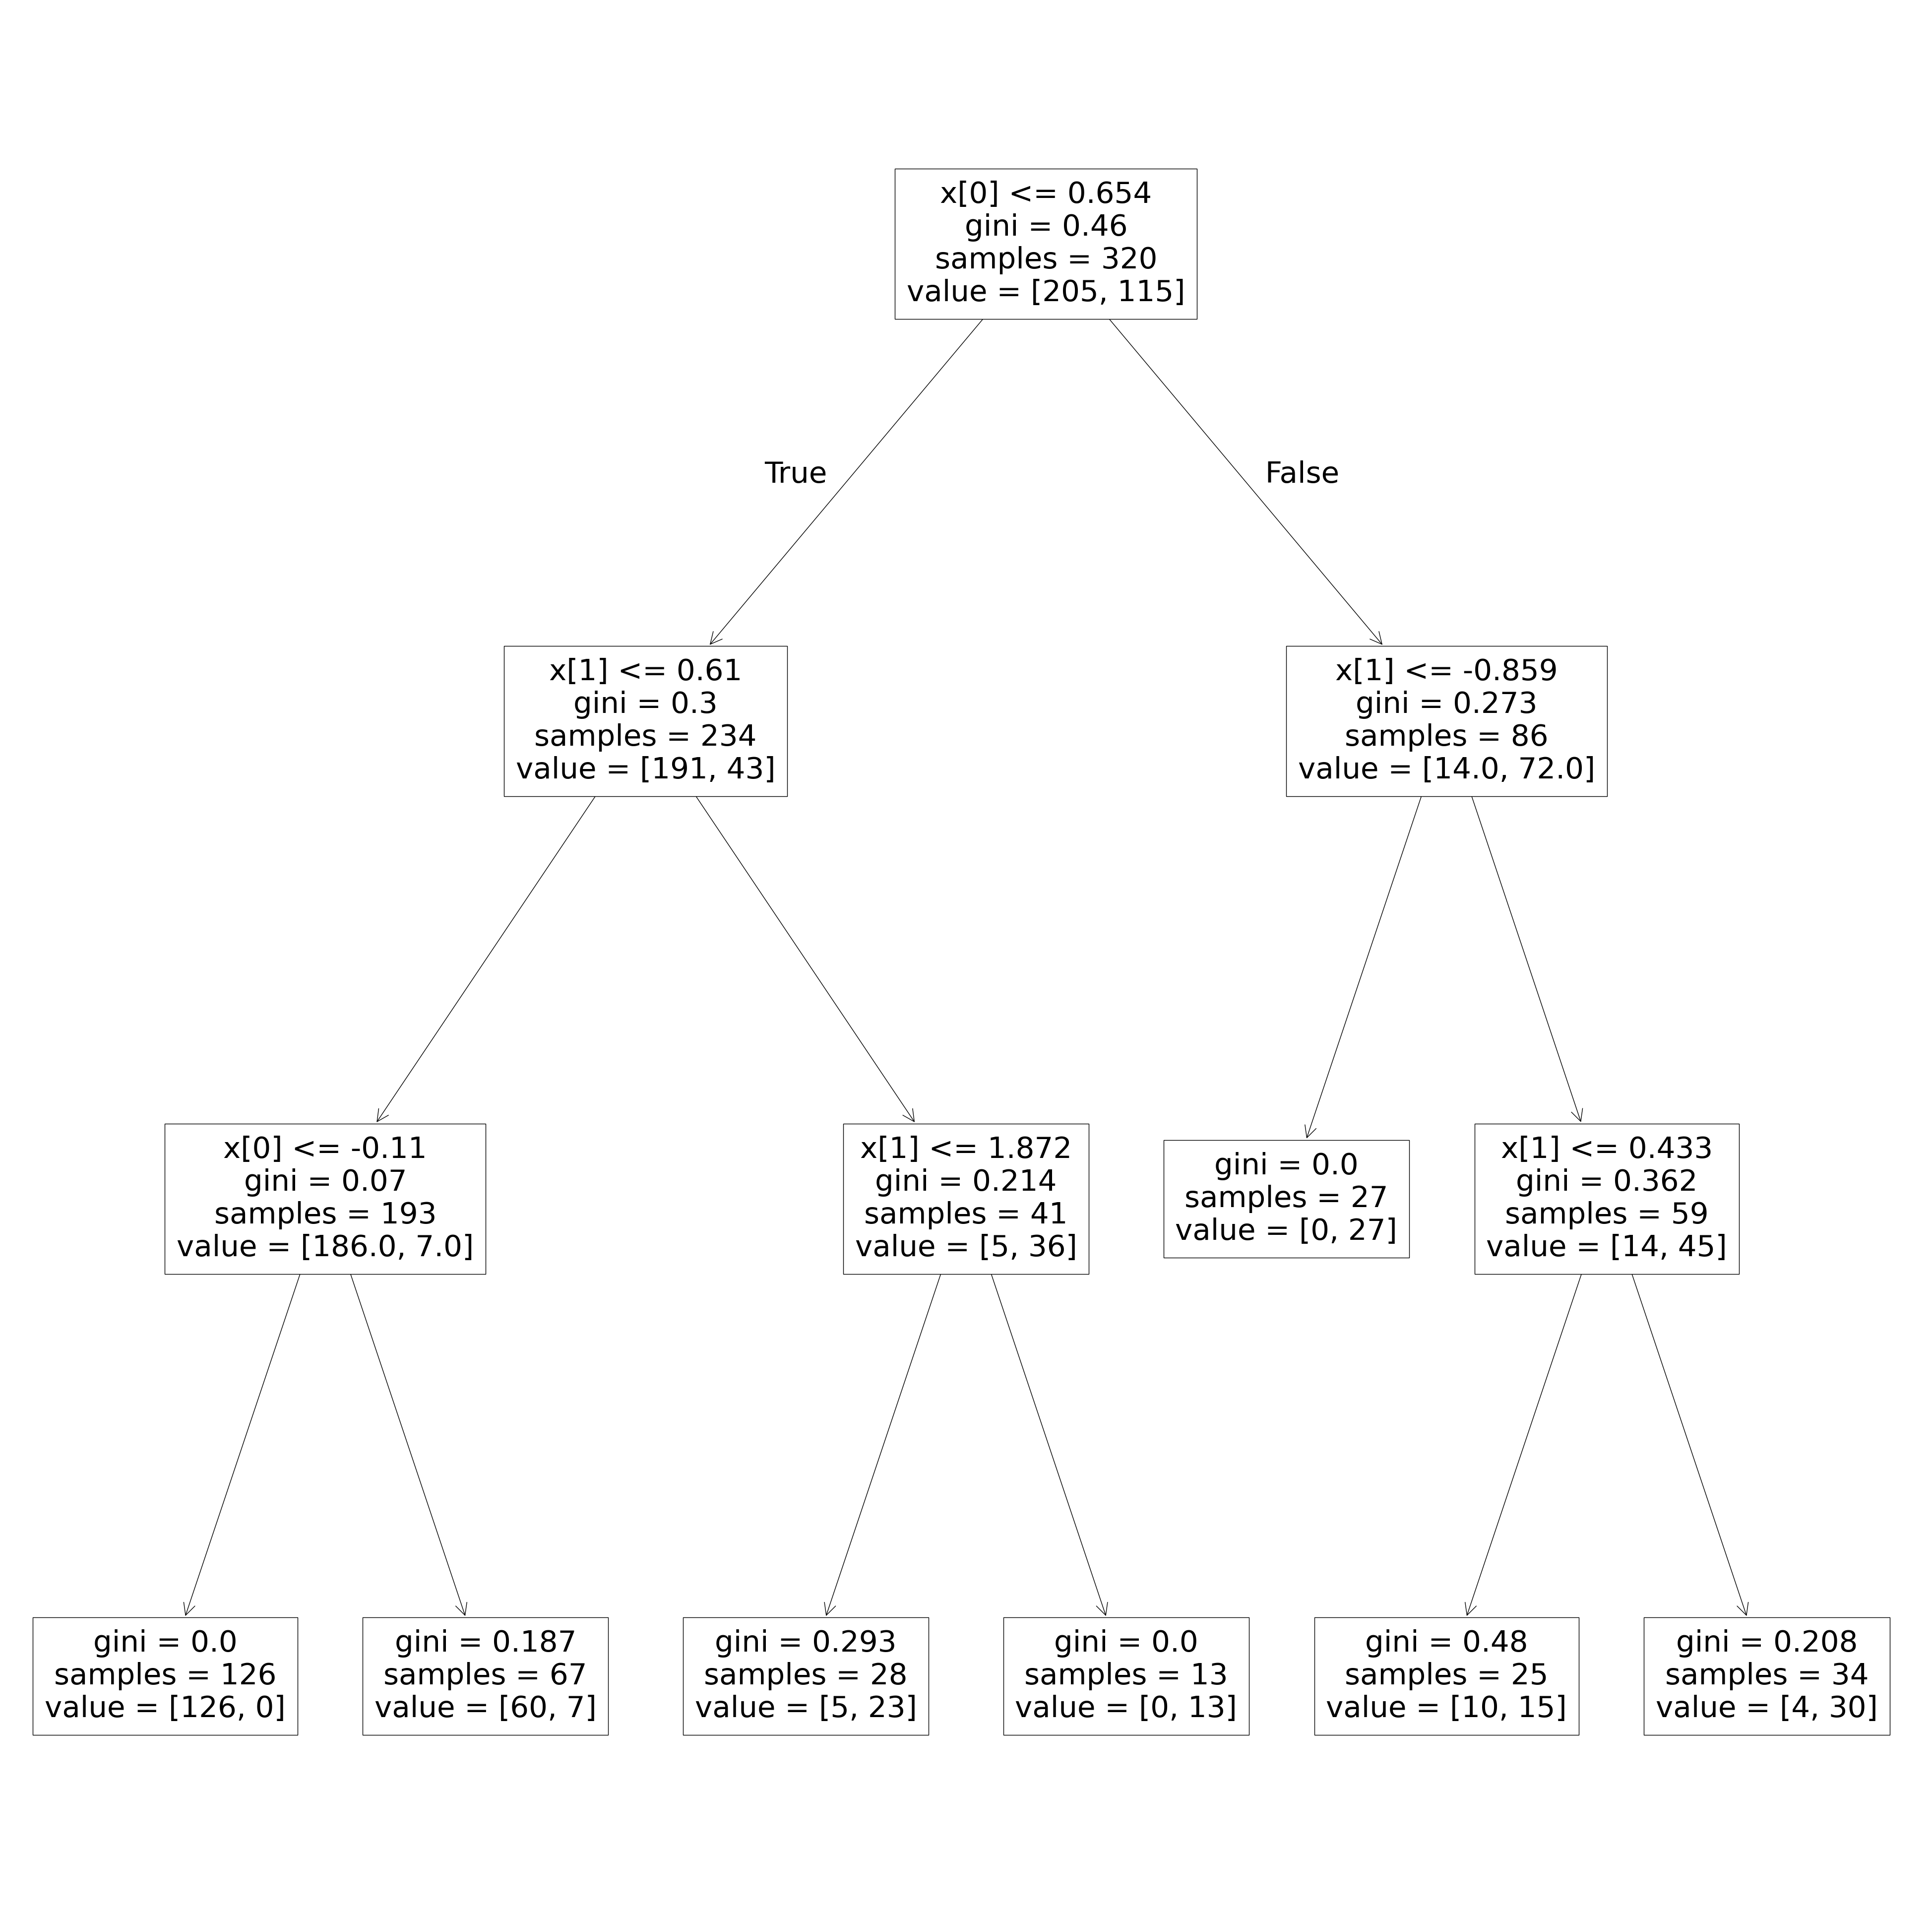

In [38]:
plt.figure(figsize=(50, 50))
plot_tree(dt)
plt.savefig('Image/Deapth3')
plt.show()